# Manipulación de datos relacionales

Juan Sosa PhD

Email [jcsosam@unal.edu.co](mailto:jcsosam@unal.edu.co)

GitHub https://github.com/jstats1702

Samuel Sánchez (revisión R y Python)

Email [ssanchezgu@unal.edu.co](mailto:ssanchezgu@unal.edu.co)

GitHub https://github.com/Samuel-col

In [1]:
# pip install igraph
# pip install pycairo
import igraph as gr
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
%matplotlib inline

## 1 Introducción

Conformación y almacenamiento de datos asociados con **datos relacionales**.

- Variables **diádicas**.
- Variables **nodales**.
- Variables **derivadas** (e.g., indicadoras de grupos).

Un **grafo** por sí solo (i.e., una colección de vértices y aristas) suele ser insuficiente como representación de una red.

La noción de **decoración** corresponde a la eventual **conjunción de vértices y aristas con otras variables** de interés (atributos).

Los conceptos y las propiedades fundamentales de la **teoría de grafos** son fundamentales.

## 2 Software

La librería `igraph` proporciona herramientas versátiles para la visualización y el análisis de redes en R, Python y C/C++. 

- https://igraph.org/
- https://kateto.net/networks-r-igraph          
- https://towardsdatascience.com/network-analysis-in-r-manipulating-network-data-ee388fba7215
- https://github.com/kolaczyk/sand

Otras alternativa populares incluyen las librerías:

- `tidygraph`.
- `network`.
- `ggnet2`.
- `ggraph`.
- `networkD3`.
- `NetworkX` (Python).

## 3 Grafos

Un **grafo** $G = (V, E)$ es una estructura que consiste de un conjunto de **vértices** (nodos) $V$ y de un conjunto de **aristas** (enlaces) $E$, donde los elementos de $E$ son parejas de la forma $e=\{u,v\}$, con $u,v\in V$. 

El **número de vértices** y el **número de aristas** se conocen como el **orden** y el **tamaño** del grafo, respectivamente.

Los **vértices** del grafo **se enumeran** con los números enteros: $1,\ldots,n$ o $0,\ldots,n-1$, con $n = |V|$.

### 3.1 Digrafos

Un grafo para el que cada arista $\{u,v\}\in E$ es tal que $\{u,v\} \not\equiv \{v,u\}$ para todo $u,v\in V$ se denomina **grafo dirigido** o **digrafo**. De lo contrario se llama grafo **no dirigido**. Por defecto, el término **grafo** hace referencia a un **grafo no dirigido**.

![](graph_digraph.png)


## 4 Multigrafos

Un **multigrafo** es aquel que permite **múltiples aristas** entre el mismo par de vértices y aristas de un vértice a sí mismo. 

Un grafo que no es un multigrafo se llama **grafo simple**.

![](multigraph.png)



### 4.1 Ejemplo: red no dirigida

In [2]:
# red no dirigida (definicion manual)
g = gr.Graph.Formula("0-1, 0-2, 1-2, 1-3, 2-4, 3-4, 3-5, 3-6, 4-5, 5-6")
# OJO: en python, a diferencia de R, los vertices se enumeran desde el cero
# otra manera
# g = gr.Graph([(0,1),(0,2),(1,2),(1,3),(2,4),(3,4),(3,5),(3,6),(4,5),(5,6)])
# clase del objeto
type(g)

igraph.Graph

In [3]:
# identificador
g

In [4]:
# vertices
list(g.vs)

[igraph.Vertex(<igraph.Graph object at 0x0000012DB35667C0>, 0, {'name': '0'}),
 igraph.Vertex(<igraph.Graph object at 0x0000012DB35667C0>, 1, {'name': '1'}),
 igraph.Vertex(<igraph.Graph object at 0x0000012DB35667C0>, 2, {'name': '2'}),
 igraph.Vertex(<igraph.Graph object at 0x0000012DB35667C0>, 3, {'name': '3'}),
 igraph.Vertex(<igraph.Graph object at 0x0000012DB35667C0>, 4, {'name': '4'}),
 igraph.Vertex(<igraph.Graph object at 0x0000012DB35667C0>, 5, {'name': '5'}),
 igraph.Vertex(<igraph.Graph object at 0x0000012DB35667C0>, 6, {'name': '6'})]

In [5]:
# Dataframe de vértices
g.get_vertex_dataframe()

,name
vertex ID,
0,0
1,1
2,2
3,3
4,4
5,5
6,6


In [6]:
# orden
g.vcount()

7

In [7]:
# aristas
list(g.es)

[igraph.Edge(<igraph.Graph object at 0x0000012DB35667C0>, 0, {}),
 igraph.Edge(<igraph.Graph object at 0x0000012DB35667C0>, 1, {}),
 igraph.Edge(<igraph.Graph object at 0x0000012DB35667C0>, 2, {}),
 igraph.Edge(<igraph.Graph object at 0x0000012DB35667C0>, 3, {}),
 igraph.Edge(<igraph.Graph object at 0x0000012DB35667C0>, 4, {}),
 igraph.Edge(<igraph.Graph object at 0x0000012DB35667C0>, 5, {}),
 igraph.Edge(<igraph.Graph object at 0x0000012DB35667C0>, 6, {}),
 igraph.Edge(<igraph.Graph object at 0x0000012DB35667C0>, 7, {}),
 igraph.Edge(<igraph.Graph object at 0x0000012DB35667C0>, 8, {}),
 igraph.Edge(<igraph.Graph object at 0x0000012DB35667C0>, 9, {})]

In [8]:
# Dataframe de aristas
g.get_edge_dataframe()

,source,target
edge ID,,
0,0,1
1,0,2
2,1,2
3,1,3
4,2,4
5,3,4
6,3,5
7,3,6
8,4,5


In [9]:
g.get_edgelist()

[(0, 1),
 (0, 2),
 (1, 2),
 (1, 3),
 (2, 4),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 5),
 (5, 6)]

In [10]:
# tamaño
g.ecount()

10

In [11]:
# ponderada?
g.is_weighted()

False

In [12]:
# simple?
g.is_simple()

True

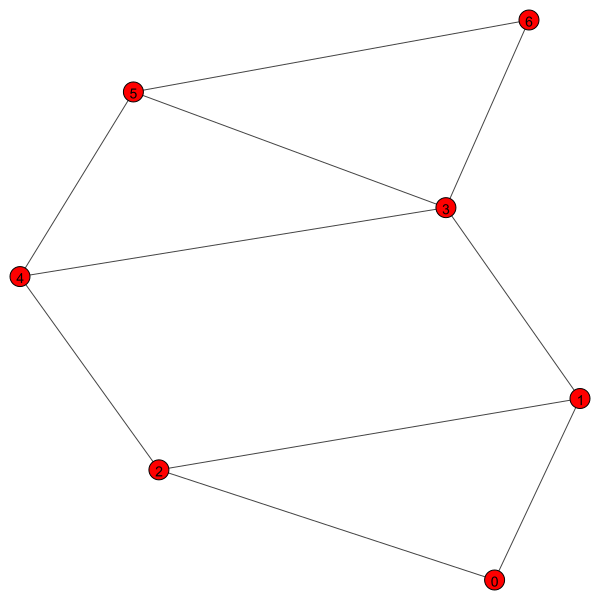

In [13]:
# visualizacion
np.random.seed(42)
g.vs['label'] = range(g.vcount()) # establecer nombres de los vértices
gr.plot(g)

In [14]:
# red ponderada
wg = g.copy()
wg.es['weight'] = list(np.round(st.uniform.rvs(size = g.ecount()), 3))
# pesos
wg.es['weight']

[0.375, 0.951, 0.732, 0.599, 0.156, 0.156, 0.058, 0.866, 0.601, 0.708]

In [15]:
# ponderada?
wg.is_weighted()

True

### 4.2 Ejemplo: red dirigida

In [16]:
# red dirigida (definicion manual)
dg = gr.Graph.Formula("1->2, 1->3, 2<->3")
# aristas
list(dg.es)

[igraph.Edge(<igraph.Graph object at 0x0000012DB35666D0>, 0, {}),
 igraph.Edge(<igraph.Graph object at 0x0000012DB35666D0>, 1, {}),
 igraph.Edge(<igraph.Graph object at 0x0000012DB35666D0>, 2, {}),
 igraph.Edge(<igraph.Graph object at 0x0000012DB35666D0>, 3, {})]

In [17]:
# Dataframe de aristas
dg.get_edge_dataframe()

,source,target
edge ID,,
0,0,1
1,0,2
2,1,2
3,2,1


In [18]:
# cambios de etiqueta
dg.vs['name'] = ['Juan','Maria','Pedro']
# agregar atributos
dg.vs['genero'] = ['M','F','M']
# aristas
list(dg.vs)

[igraph.Vertex(<igraph.Graph object at 0x0000012DB35666D0>, 0, {'name': 'Juan', 'genero': 'M'}),
 igraph.Vertex(<igraph.Graph object at 0x0000012DB35666D0>, 1, {'name': 'Maria', 'genero': 'F'}),
 igraph.Vertex(<igraph.Graph object at 0x0000012DB35666D0>, 2, {'name': 'Pedro', 'genero': 'M'})]

In [19]:
# Dataframe de aristas
print(dg.get_edge_dataframe())
print('-'*30)
# Dataframe de vértices
print(dg.get_vertex_dataframe())

         source  target
edge ID                
0             0       1
1             0       2
2             1       2
3             2       1
------------------------------
            name genero
vertex ID              
0           Juan      M
1          Maria      F
2          Pedro      M


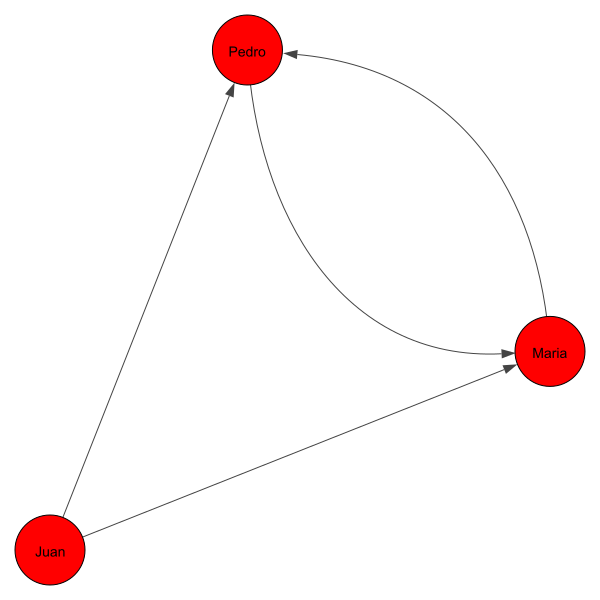

In [20]:
# Visualización
np.random.seed(42)
dg.vs['label'] = dg.vs['name'] 
gr.plot(dg, vertex_size = 70, margin = 50)

### 4.3 Ejemplo: multigrafo

In [21]:
# multigrafo
mg = g.copy()
mg.add_edges([(1,2),(4,5)])
mg.get_edge_dataframe()

,source,target
edge ID,,
0,0,1
1,0,2
2,1,2
3,1,3
4,2,4
5,3,4
6,3,5
7,3,6
8,4,5


In [22]:
# simple?
mg.is_simple()

False

In [23]:
# simplificacion a grafo ponderado
mg.es['weight'] = 1
wg2 = mg.copy()
wg2 = wg2.simplify(combine_edges = 'sum')
wg2.get_edge_dataframe()

,source,target,weight
edge ID,,,
0,0,1,1.0
1,0,2,1.0
2,1,2,2.0
3,1,3,1.0
4,2,4,1.0
5,3,4,1.0
6,3,5,1.0
7,3,6,1.0
8,4,5,2.0


In [24]:
# simple?
wg2.is_simple()

True

In [25]:
# aristas
wg2.get_edgelist()

[(0, 1),
 (0, 2),
 (1, 2),
 (1, 3),
 (2, 4),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 5),
 (5, 6)]

In [26]:
# pesos?
wg2.es['weight']

[1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0]

## 5 Estructuras de datos relacionales

Generalmente los grafos **no se definen manualmente** ya que la mayoría de las redes en la práctica son ***grandes***.

Los datos para construir un grafo comúnmente se almacenarán en un **archivo de datos**. 

### 5.1 Matriz de adyacencia

La **matriz de adyacencia** $\mathbf{Y} = [y_{i,j}]$ asociada con un **grafo binario** $G=(V,E)$ con $n$ vértices es una **matriz binaria** de $n\times n$ tal que $y_{i,j} = 1$ si $\{i,j\} \in E$ y $y_{i,j} = 0$ en otro caso.

La **diagonal principal** de una matriz de adyacencia está llena de **ceros estructurales**.

La matriz de adyacencia de un **grafo no dirigido** es **necesariamente simétrica**. 

La matriz de adyacencia de un **grafo dirigido** es **posiblemente asimétrica**.

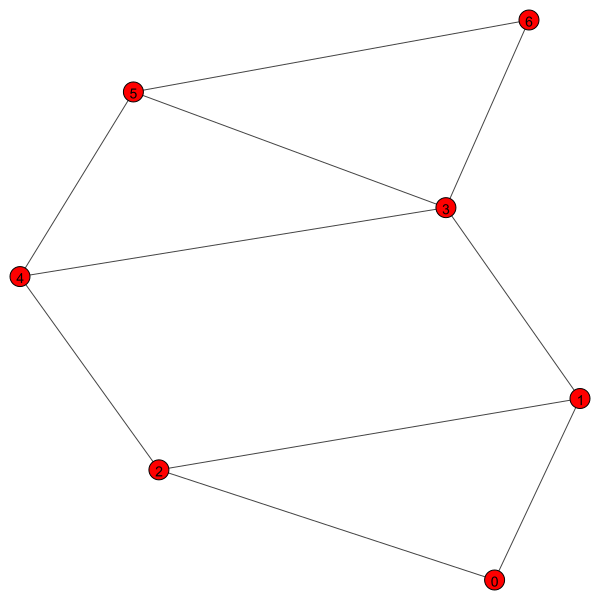

In [27]:
# red no dirigida (definicion manual)
g = gr.Graph.Formula("0-1, 0-2, 1-2, 1-3, 2-4, 3-4, 3-5, 3-6, 4-5, 5-6")
# visualizacion
np.random.seed(42)
g.vs['label'] = range(g.vcount())
gr.plot(g)

In [28]:
# matriz de adjacencia dispersa (sparse)
A = g.get_adjacency_sparse()
type(A)

scipy.sparse.csr.csr_matrix

In [29]:
A

<7x7 sparse matrix of type '<class 'numpy.intc'>'
	with 20 stored elements in Compressed Sparse Row format>

In [30]:
# matriz de adyacencia
Y = g.get_adjacency()
type(Y)

igraph.datatypes.Matrix

In [31]:
# convertir a matriz de numpy
Y_np = np.array(Y.data)
type(Y_np)

numpy.ndarray

In [32]:
# simetrica?
(Y_np == Y_np.T).all()

True

In [33]:
Y_np

array([[0, 1, 1, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 1, 1, 1],
       [0, 0, 1, 1, 0, 1, 0],
       [0, 0, 0, 1, 1, 0, 1],
       [0, 0, 0, 1, 0, 1, 0]])

In [34]:
# version vectorizada completa
# NOTA: python asigna índices recorriendo la submatriz inferior POR FILAS, por lo tanto debemos modificar dichos índices.
ltri_i,ltri_j = np.tril_indices(Y_np.shape[0],k=-1) # k = -1 para que tome los elementos bajo la diagonal principal
y = Y_np[np.flip(6-ltri_i),np.flip(6-ltri_j)]
type(y)

numpy.ndarray

In [35]:
len(y)

21

In [36]:
y

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1])

In [37]:
# version vectorizada indexada
yy, = np.where(y == 1)
type(yy)

numpy.ndarray

In [38]:
len(yy)

10

In [39]:
yy

array([ 0,  1,  6,  7, 12, 15, 16, 17, 18, 20], dtype=int64)

### 5.2 Matriz de aristas

Una **matriz de aristas** es un **arreglo de dos columnas** conformado por todos los **pares de vértices** que están **unidos** por una arista.

¿Y los **vértices aislados**?

In [40]:
# matriz de aristas
n = Y_np.shape[0]
A = []
for i in range(n-1):
    for j in range(i+1,n):
        if Y[i,j] == 1: # podemos usar Y o Y_np
            A.append([i,j])
A = np.array(A)
type(A)

numpy.ndarray

In [41]:
A

array([[0, 1],
       [0, 2],
       [1, 2],
       [1, 3],
       [2, 4],
       [3, 4],
       [3, 5],
       [3, 6],
       [4, 5],
       [5, 6]])

In [42]:
# generar dataframe
A_df = g.get_edge_dataframe()
A_df

,source,target
edge ID,,
0,0,1
1,0,2
2,1,2
3,1,3
4,2,4
5,3,4
6,3,5
7,3,6
8,4,5


In [43]:
# convertir a matriz
np.array(A_df)

array([[0, 1],
       [0, 2],
       [1, 2],
       [1, 3],
       [2, 4],
       [3, 4],
       [3, 5],
       [3, 6],
       [4, 5],
       [5, 6]], dtype=int64)

### 5.3 Ejemplo: Lazega

Red de **relaciones de trabajo colaborativo** entre miembros de una firma de abogados (SG&R). 

Un enlace indica que los miembros de la firma han trabajado juntos en al menos un caso. Es decir, $y_{i,j} = 1$ si los miembros de la firma $i$ y $j$ han trabajado juntos en al menos un caso, y $y_{i,j} = 0$ en otro caso.

Estos datos fueron recolectados con el propósito de **estudiar la cooperación** entre los actores sociales de una organización. 

***Lazega, E. (2001). The collegial phenomenon: The social mechanisms of cooperation among peers in a corporate law partnership. Oxford University Press on Demand.***

Disponible en el paquete `sand` de R, entre otros.

https://www.stats.ox.ac.uk/~snijders/siena/Lazega_lawyers_data.htm


In [44]:
# Datos
# descargue el .zip del link anterior
# extraiga la carpeta dentro de la carpeta en la que esta este jupiter notebook
# OJO: el nombre de la carpeta debe ser LazegaLawyers. 
#      de lo contrario, modifique adecuadamente la siguiente linea de código
lazega_adj = np.genfromtxt('LazegaLawyers/ELwork36.dat', delimiter= ' ')
# datos
type(lazega_adj) # es la matriz de adyacencia

numpy.ndarray

In [45]:
# matriz de adyacencia
lazega_adj

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
lazega_attr_np = np.genfromtxt('LazegaLawyers/ELattr.dat', delimiter = ' ')

In [47]:
# Dataframe de atributos
lazega_attr = pd.DataFrame(data = lazega_attr_np, columns = ['Seniority', 'Status', 'Gender', 'Office', 'Years', 'Age', 'Practice', 'School'])
lazega_attr['Name'] = ['V' + str(i) for i in range(lazega_attr.shape[0])]
type(lazega_attr)

pandas.core.frame.DataFrame

In [48]:
lazega_attr = lazega_attr[:31]
lazega_attr.head()

,Seniority,Status,Gender,Office,Years,Age,Practice,School,Name
0,1.0,1.0,1.0,1.0,31.0,64.0,1.0,1.0,V0
1,2.0,1.0,1.0,1.0,32.0,62.0,2.0,1.0,V1
2,3.0,1.0,1.0,2.0,13.0,67.0,1.0,1.0,V2
3,4.0,1.0,1.0,1.0,31.0,59.0,2.0,3.0,V3
4,5.0,1.0,1.0,2.0,31.0,59.0,1.0,2.0,V4


In [49]:
# grafo
g_lazega = gr.Graph.Adjacency(lazega_adj, mode = 'undirected')
# atributos
for j in range(lazega_attr.shape[1]):
    attr_name = lazega_attr.columns[j]
    g_lazega.vs[attr_name] = lazega_attr[attr_name]
# ver también:
# gr.Graph.Read_Adjacency('LazegaLawyers/ELwork36.dat', sep = ' ')
# gr.Graph.DataFrame (con esta opción los atributos se pueden pasar como un argumento mas)
# gr.Graph.DictList
# gr.Graph.from_graph_tool
# gr.Graph.from_networkx
# gr.Graph.Incidence
# gr.Graph.Read
# gr.Graph.Read_GraphMLz
# gr.Graph.Read_Pickle
# gr.Graph.Read_Picklez
# gr.Graph.TupleList
# gr.Graph.Weighted_Adjacency

In [50]:
# simple?
g_lazega.is_simple()

True

In [51]:
# ponderado?
g_lazega.is_weighted()

False

In [52]:
# orden
g_lazega.vcount()

36

In [53]:
# tamaño
g_lazega.ecount()

115

In [54]:
# atributos
g_lazega.vertex_attributes()

['Seniority',
 'Status',
 'Gender',
 'Office',
 'Years',
 'Age',
 'Practice',
 'School',
 'Name']

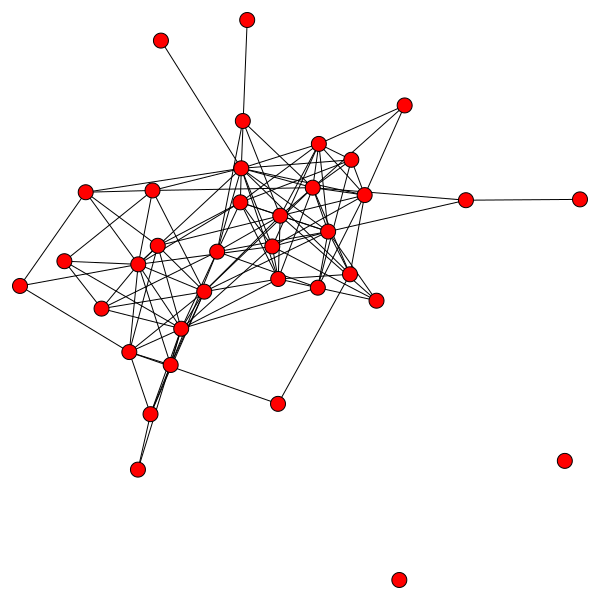

In [55]:
# grafico
np.random.seed(42)
gr.plot(g_lazega, edge_color = 'black', vertex_size = 15)

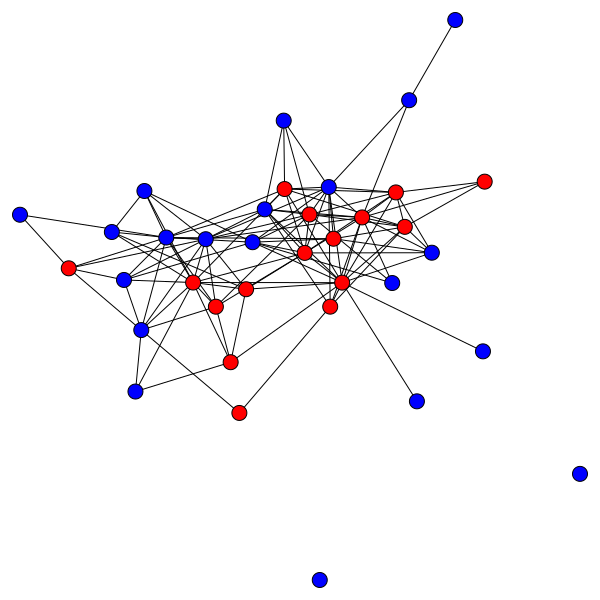

In [56]:
# visualizacion
np.random.seed(42)
tmp_colors = np.array(['blue','red'])[np.array(g_lazega.vs['Practice'], dtype = int) - 1]
gr.plot(g_lazega, edge_color = 'black', vertex_size = 15, vertex_color = tmp_colors)

## 6 Conceptos fundamentales de la teoría de grafos

### 6.1 Subgrafo

Un grafo $G'=(V',E')$ es un **subgrafo** de $G=(V,E)$ si $V'\subset V$ y $E'\subset E$.

<img src='subgraph.png' width = 600\>

### 6.2 Grafos isomorfos

Dos grafos que son **equivalentes en su estructura** (a pesar de las etiquetas de los vértices) se denominan **isomorfos**. 

<img src='iso0.jpg' width = 600\>

Dos grafos $G_1 = (V_1, E_1)$ y $G_2 = (V_2, E_2)$ son **isomorfos**, $G_1 \equiv G_2$, si existe una biyección $\varphi:V_1\longrightarrow V_2$ tal que $\{u,v\}\in E_1$ si y solo si $\{\varphi(u),\varphi(v)\}\in E_2$.

Si $G_1 \equiv G_2$, entonces $|V_1| = |V_2|$ y $|E_1| = |E_2|$.

Si $G_1 \equiv G_2$ y $\{u,v\}\notin E_1$, entonces $\{\varphi(u),\varphi(v)\}\notin E_2$.

### 6.3  Ejemplo

¿$G_1$ y $G_2$ son isomorfos?

<img src='iso1.png' width = 600\>

### 6.4 Adyacencia

Se dice que dos vértices $u, v \in V$ son **adyacentes** (vecinos), lo que se denota con $u\sim v$, si $u$ y $v$ están conectados por alguna arista en $E$.


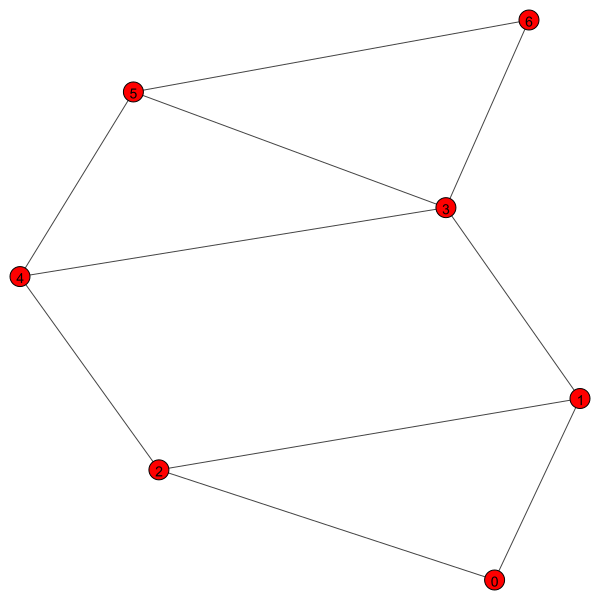

In [57]:
# red no dirigida (definición manual)
g = gr.Graph.Formula('0-1, 0-2, 1-2, 1-3, 2-4, 3-4, 3-5, 3-6, 4-5, 5-6')
# visualización
np.random.seed(42)
g.vs['label'] = range(g.vcount())
gr.plot(g)

In [58]:
# vecinos del vértices 0 (el primero)
g.neighbors(vertex = 0)

[1, 2]

Un vértice se llama **asilado** (*isolated*) si no es adyacente a ningún otro nodo (un grafo se puede representar con una matriz de aristas más una lista de vértices aislados). 

Un vértice $v \in V$ es **incidente** (*incident*) en una arista $e \in E$ si $e=\{v,u\}$ para algún $u\in V$. 

El **grado** (*degree*) de un vértice $v$ se define como el número de aristas incidentes en $v$.

In [59]:
# grados
g.degree()

[2, 3, 3, 4, 3, 3, 2]

Para dígrafos, el **grado de entrada** (*in-degree*) y el **grado de salida** (*out-degree*) de un vértice se definen como el número de aristas que apuntan hacia dentro y hacia fuera del vértice, respectivamente.


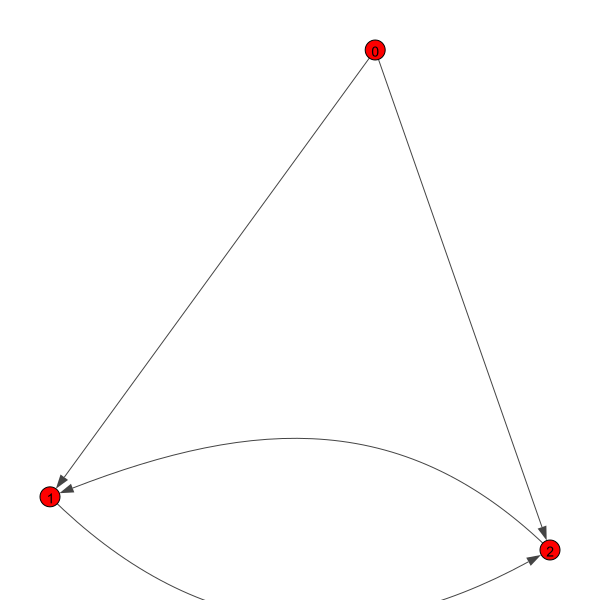

In [60]:
# red dirigida (definicion manual)
dg = gr.Graph.Formula('0->1, 0->2, 1<->2')
# visualizacion
np.random.seed(42)
dg.vs['label'] = range(dg.vcount())
gr.plot(dg, margin = 50)

In [61]:
# grado de entrada
dg.degree(mode = 'in')

[0, 2, 2]

In [62]:
# grado de salida
dg.degree(mode = 'out')

[2, 1, 1]

### 6.5 Movimiento

Una **caminata** (*walk*) de $v_0$ a $v_\ell$ es una secuencia alternante $\{v_0,e_1,v_1,e_2,v_2,\ldots,v_{\ell-1},e_\ell,v_\ell\}$ donde los puntos extremos de $e_i$ son $\{v_{i-1}, v_i\}$ para $i=1,\ldots,\ell$. Se dice que la **longitud** de esta caminata es $\ell$. Pueden haber caminatas abiertas o cerradas.

- 1->2->3->4->3    es una caminata abierta. 
- 1->2->3->4->3->1 es una caminata cerrada.

<img src='walk.png' width = 200\>

Un **sendero** (*trail*) es una caminata abierta sin aristas repetidas (se pueden repetir vértices).

- 1->3->8->6->3->2 es un sendero. 

<img src='trail.png' width = 200\>

Un **circuito** (*circuit*) es una caminata cerrada sin aristas repetidas (se pueden repetir vértices). 

- 1->2->4->3->6->8->3->1 es un circuito.

<img src='circuit.png' width = 200\>

Un **ciclo** (*cycle*) es una caminata cerrada con al menos tres aristas no repetidas y vértices intermedios son distintos.

- 1->2->4->3->1 es un ciclo. 

<img src='cycle.png' width = 200\>

Los grafos que no contienen ciclos se denominan **acíclicos** (*acycle*).

Se dice que un vértice $v$ es **accesible** desde otro vértice $u$ si existe una caminata desde $u$ hasta $v$. 

Se dice que un grafo está **conectado** si cada vértice es accesible desde todos los demás. 

Grafos conectados con 5 vértices:

<img src='connectedG5.png' width = 500\>

Una **componente** de un grafo es un subgrafo conectado maximalmente, i.e., un subgrafo para el cual la adición de cualquier otro vértice arruina la propiedad de conectividad.

Grafo con tres componentes conectadas:

<img src='connectedcomponent.png' width = 300\>

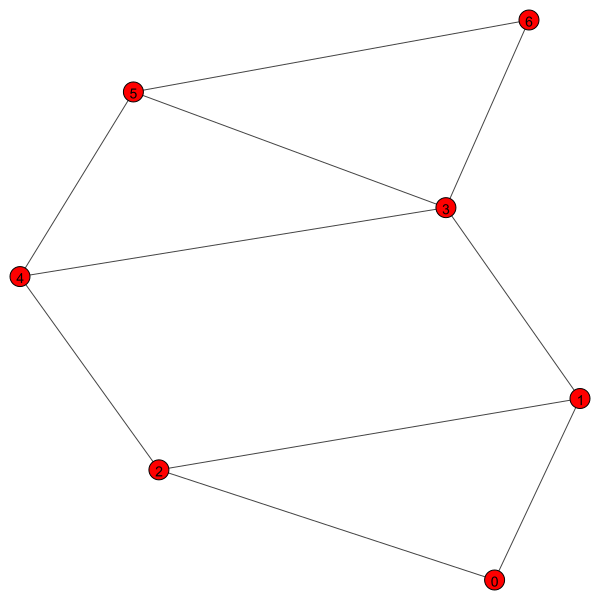

In [63]:
# red no dirigida (definición manual)
g = gr.Graph.Formula('0-1, 0-2, 1-2, 1-3, 2-4, 3-4, 3-5, 3-6, 4-5, 5-6')
# visualización
np.random.seed(42)
g.vs['label'] = range(g.vcount())
gr.plot(g)

In [64]:
# conectado?
g.is_connected()

True

In [65]:
# componentes
g_cl = g.clusters()
len(g_cl) # cantidad de clusters

1

In [66]:
# Tamaño de los clusters
g_cl.sizes()

[7]

In [67]:
# Vértices en el primer cluster
g_cl[0]

[0, 1, 2, 3, 4, 5, 6]

Un dígrafo está **conectado débilmente** si el grafo subyacente no dirido (resultado de remover la direccionalidad) está conectado, y se llama **conectado fuertemente** si cada vértice es accesible desde todos los demás mediante una caminata dirigida.


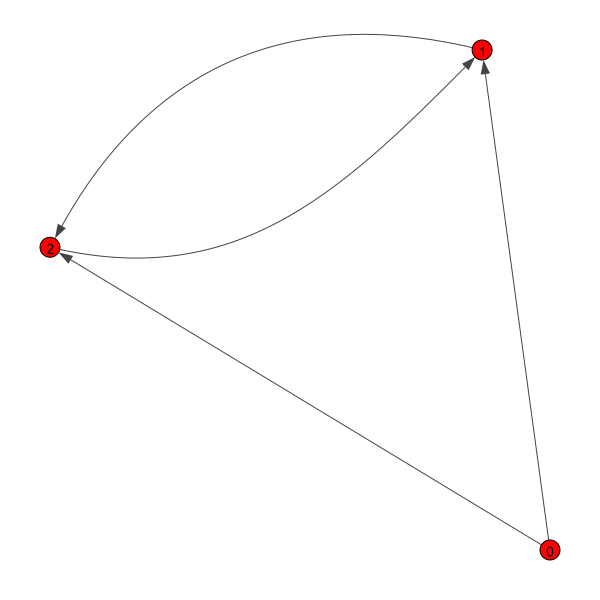

In [68]:
# red dirigida (definicion manual)
dg = gr.Graph.Formula('0->1, 0->2, 1<->2')
# visualizacion
np.random.seed(42)
dg.vs['label'] = range(dg.vcount())
gr.plot(dg, margin = 50)

In [69]:
# conectado debilmente?
dg.is_connected(mode = 'weak')

True

In [70]:
# conectado fuertemente?
dg.is_connected(mode = 'strong')

False

### 6.6 Distancia

La **distancia geodésica** entre dos vértices de un grafo se define como la longitud del camino más corto entre los vértices (se establece igual a infinito si no existen caminos).

El valor de la distancia más grande de un grafo se llama **diámetro** del grafo.

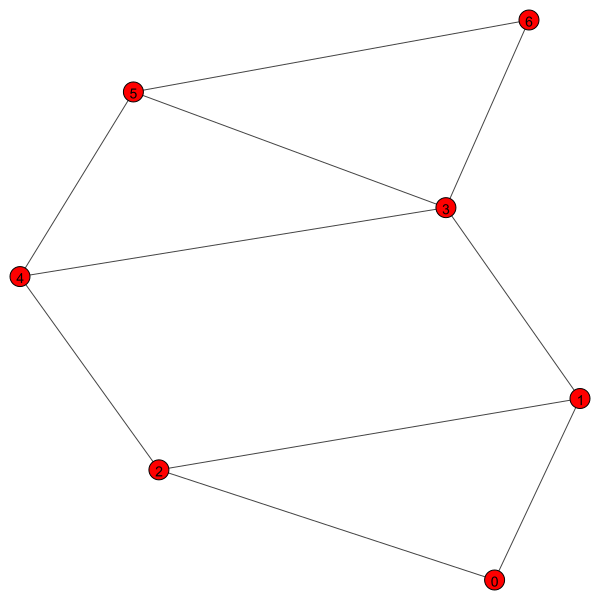

In [71]:
# red no dirigida (definición manual)
g = gr.Graph.Formula('0-1, 0-2, 1-2, 1-3, 2-4, 3-4, 3-5, 3-6, 4-5, 5-6')
# visualización
np.random.seed(42)
g.vs['label'] = range(g.vcount())
gr.plot(g)

In [72]:
# distancia
g.shortest_paths(source = 0, target = 5)

[[3]]

In [73]:
# caminata
g.get_shortest_paths(v = 0, to = 5)

[[0, 1, 3, 5]]

In [74]:
# caminatas
g.get_all_shortest_paths(v = 0, to = 5)

[[0, 2, 4, 5], [0, 1, 3, 5]]

In [75]:
# distancias
D = g.shortest_paths()
D = np.array(D)
D

array([[0, 1, 1, 2, 2, 3, 3],
       [1, 0, 1, 1, 2, 2, 2],
       [1, 1, 0, 2, 1, 2, 3],
       [2, 1, 2, 0, 1, 1, 1],
       [2, 2, 1, 1, 0, 1, 2],
       [3, 2, 2, 1, 1, 0, 1],
       [3, 2, 3, 1, 2, 1, 0]])

In [76]:
# diametro
g.diameter()

3

In [77]:
ltri_i,ltri_j = np.tril_indices(D.shape[0], k = -1) # k = -1 para que tome los elementos bajo la diagonal principal
D_lower_vector = D[np.flip(6-ltri_i), np.flip(6-ltri_j)]
max(D_lower_vector)

3

In [78]:
# sendero
extremos = g.farthest_points()
# extremos es un a tripla que contiene: (id_del origen,id_del destino,longitud de la caminata)
d = g.get_shortest_paths(v = extremos[0], to = extremos[1])
d = d[0]
d

[0, 1, 3, 5]

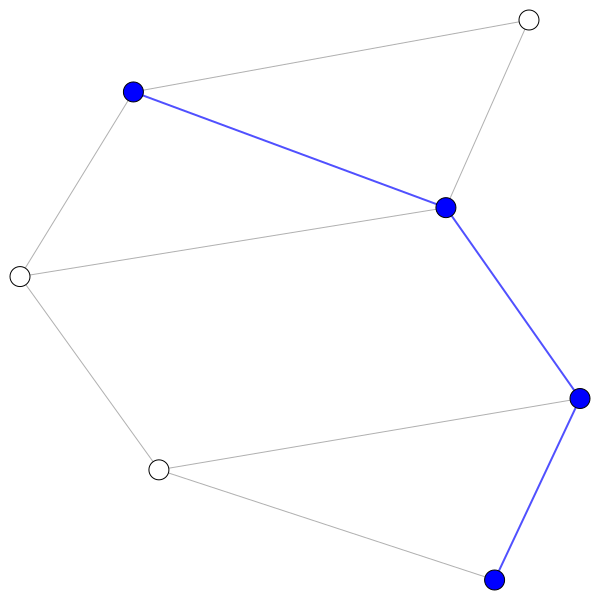

In [79]:
# visualizacion del diametro
visual_style = {}
# color de los vertices
v_color = np.array(['#ffffff']*g.vcount())
v_color[d] = '#0000ff'
# grueso de las aristas
path_edges = [(d[i], d[i+1]) for i in range(len(d)-1)]
e_width = [2 if (e.tuple in path_edges) else 1 for e in g.es]
# color de las aristas
e_color = ['#5050ff' if (e.tuple in path_edges) else '#b0b0b0' for e in g.es]
# quitar nombres
g.vs['label'] = None
# grafico
np.random.seed(42)
gr.plot(g,vertex_color = v_color, edge_width = e_width, edge_color = e_color)

In [80]:
# distancia promedio (grado de separacion)
g.average_path_length()

1.6666666666666667

In [81]:
np.mean(D_lower_vector)

1.6666666666666667

In [82]:
# distribucion de las distancias
unique, counts = np.unique(D_lower_vector, return_counts=True)
pd.DataFrame(data = [counts],columns = unique)

,1,2,3
0,10,8,3


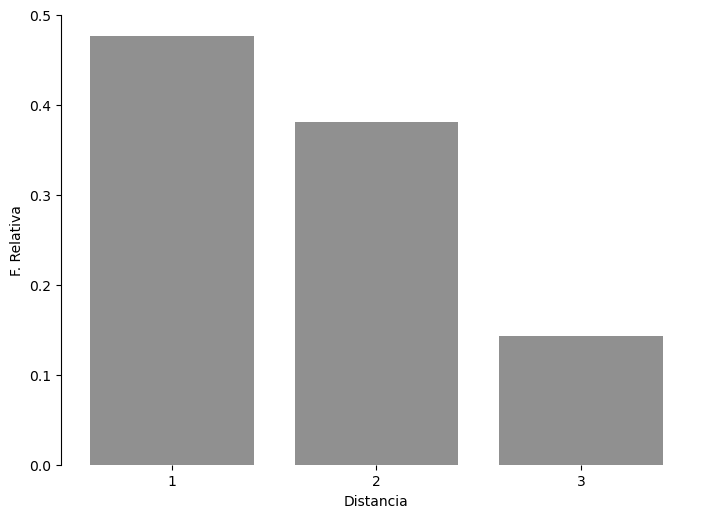

In [83]:
# visualizacion
senderos = counts
f = plt.figure(figsize = (7, 5),dpi = 100)
axes = f.add_axes([0.1,0.1,0.9,0.9])
axes.bar(x = unique, height = senderos/sum(senderos), color = '#909090')
axes.set_xlabel('Distancia')
axes.set_ylabel('F. Relativa')
axes.set_xticks([1,2,3])
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['bottom'].set_visible(False)
plt.show()